
# Ex 4. Time-Lapse ERT Inversion Techniques

This example demonstrates different approaches for time-lapse electrical 
resistivity tomography (ERT) inversion using PyHydroGeophysX.

The example includes:
1. Full time-lapse inversion with temporal regularization
2. Windowed time-lapse inversion for large datasets
3. L1-norm regularized inversion for sharp boundary recovery
4. Comparison of different inversion strategies
5. Visualization of resistivity evolution over time

Time-lapse ERT inversion is crucial for monitoring subsurface water 
content changes and understanding hydrological processes in watersheds.
The temporal regularization helps maintain consistency between consecutive
time steps while allowing for realistic changes.


In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pygimli as pg
from pygimli.physics import ert
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Setup package path for development
try:
    # For regular Python scripts
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    # For Jupyter notebooks
    current_dir = os.getcwd()

# Add the parent directory to Python path
parent_dir = os.path.dirname(current_dir)
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

# Import PyHydroGeophysX modules
from PyHydroGeophysX.inversion.time_lapse import TimeLapseERTInversion
from PyHydroGeophysX.inversion.windowed import WindowedTimeLapseERTInversion

In [2]:
data_dir = "C:/Users/HChen8/Documents/GitHub/PyHydroGeophysX/examples/results/TL_measurements/appres"

# List of ERT data files testing monthly time-lapse inversion
ert_files = [
    "synthetic_data30.dat",
    "synthetic_data60.dat",
    "synthetic_data90.dat",
    "synthetic_data120.dat",
    "synthetic_data150.dat",
    "synthetic_data180.dat",
    "synthetic_data210.dat",
    "synthetic_data240.dat",
    "synthetic_data270.dat",
    "synthetic_data300.dat",
    "synthetic_data330.dat",
    "synthetic_data360.dat",
]

## 1.Full L2 Time-Lapse Inversion



#################### FUll Time-Lapse Inversion #####################



In [3]:
# Full paths to data files
data_files = [os.path.join(data_dir, f) for f in ert_files]

# Measurement times (can be timestamps or any sequential numbers representing time)
measurement_times = [1, 2, 3, 4, 5, 6, 7 ,8, 9, 10, 11, 12]  # Adjust based on your actual acquisition times

# Create a mesh for the inversion (or load an existing one)
data = ert.load(data_files[0])
ert_manager = ert.ERTManager(data)
mesh = ert_manager.createMesh(data=data, quality=34)

# Set up inversion parameters
inversion_params = {
    "lambda_val": 50.0,              # Regularization parameter
    "alpha": 10.0,                   # Temporal regularization parameter
    "decay_rate": 0.0,               # Temporal decay rate
    "method": "cgls",                # Solver method ('cgls', 'lsqr', etc.)
    "model_constraints": (0.001, 1e4), # Min/max resistivity values (ohm-m)
    "max_iterations": 15,            # Maximum iterations
    "absoluteUError": 0.0,           # Absolute data error (V)
    "relativeError": 0.05,           # Relative data error (5%)
    "lambda_rate": 1.0,              # Lambda reduction rate
    "lambda_min": 1.0,               # Minimum lambda value
    "inversion_type": "L2"           # 'L1', 'L2', or 'L1L2'
}

# Create the time-lapse inversion object
inversion = TimeLapseERTInversion(
    data_files=data_files,
    measurement_times=measurement_times,
    mesh=mesh,
    **inversion_params
)

# Run the inversion
print("Starting time-lapse inversion...")
result = inversion.run()
print("Inversion complete!")

24/05/25 - 22:04:05 - pyGIMLi - INFO - Found 2 regions.


24/05/25 - 22:04:05 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


24/05/25 - 22:04:05 - pyGIMLi - INFO - Found 2 regions.


24/05/25 - 22:04:05 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


24/05/25 - 22:04:05 - pyGIMLi - INFO - Found 2 regions.


24/05/25 - 22:04:05 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


24/05/25 - 22:04:05 - pyGIMLi - INFO - Found 2 regions.


24/05/25 - 22:04:05 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


24/05/25 - 22:04:05 - pyGIMLi - INFO - Found 2 regions.


24/05/25 - 22:04:05 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


24/05/25 - 22:04:05 - pyGIMLi - INFO - Found 2 regions.


24/05/25 - 22:04:05 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


24/05/25 - 22:04:05 - pyGIMLi - INFO - Found 2 regions.


24/05/25 - 22:04:05 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


24/05/25 - 22:04:05 - pyGIMLi - INFO - Found 2 regions.


24/05/25 - 22:04:05 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


24/05/25 - 22:04:05 - pyGIMLi - INFO - Found 2 regions.


Starting time-lapse inversion...


24/05/25 - 22:04:05 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


24/05/25 - 22:04:05 - pyGIMLi - INFO - Found 2 regions.


24/05/25 - 22:04:05 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


24/05/25 - 22:04:05 - pyGIMLi - INFO - Found 2 regions.


24/05/25 - 22:04:05 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


24/05/25 - 22:04:05 - pyGIMLi - INFO - Found 2 regions.


24/05/25 - 22:04:05 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


24/05/25 - 22:04:05 - pyGIMLi - INFO - Found 2 regions.


24/05/25 - 22:04:05 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


24/05/25 - 22:04:05 - pyGIMLi - INFO - Creating forward mesh from region infos.


24/05/25 - 22:04:05 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


24/05/25 - 22:04:05 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


24/05/25 - 22:04:16 - pyGIMLi - INFO - Creating forward mesh from region infos.


24/05/25 - 22:04:16 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


24/05/25 - 22:04:16 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


24/05/25 - 22:04:25 - pyGIMLi - INFO - Creating forward mesh from region infos.


24/05/25 - 22:04:25 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


24/05/25 - 22:04:25 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


24/05/25 - 22:04:34 - pyGIMLi - INFO - Creating forward mesh from region infos.


24/05/25 - 22:04:34 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


24/05/25 - 22:04:34 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


24/05/25 - 22:04:43 - pyGIMLi - INFO - Creating forward mesh from region infos.


24/05/25 - 22:04:44 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


24/05/25 - 22:04:44 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


24/05/25 - 22:04:53 - pyGIMLi - INFO - Creating forward mesh from region infos.


24/05/25 - 22:04:53 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


24/05/25 - 22:04:53 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


24/05/25 - 22:05:02 - pyGIMLi - INFO - Creating forward mesh from region infos.


24/05/25 - 22:05:02 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


24/05/25 - 22:05:02 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


24/05/25 - 22:05:12 - pyGIMLi - INFO - Creating forward mesh from region infos.


24/05/25 - 22:05:12 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


24/05/25 - 22:05:12 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


24/05/25 - 22:05:21 - pyGIMLi - INFO - Creating forward mesh from region infos.


24/05/25 - 22:05:21 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


24/05/25 - 22:05:21 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


24/05/25 - 22:05:31 - pyGIMLi - INFO - Creating forward mesh from region infos.


24/05/25 - 22:05:31 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


24/05/25 - 22:05:31 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


24/05/25 - 22:05:41 - pyGIMLi - INFO - Creating forward mesh from region infos.


24/05/25 - 22:05:41 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


24/05/25 - 22:05:41 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


24/05/25 - 22:05:51 - pyGIMLi - INFO - Creating forward mesh from region infos.


24/05/25 - 22:05:51 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


24/05/25 - 22:05:51 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 2345.302026235805
dPhi: 1.0
ERTphi_d: 23302920.932678957, ERTphi_m: 0.0, ERTphi_t: 0.0


-------------------ERT Iteration: 1 ---------------------------


ERT chi2: 67.57962709246587
dPhi: 0.9711851069344231
ERTphi_d: 671471.1747907408, ERTphi_m: 18389.227344704283, ERTphi_t: 7058.104426749452


-------------------ERT Iteration: 2 ---------------------------


ERT chi2: 5.249398091800431
dPhi: 0.9223227721482107
ERTphi_d: 52158.01944012908, ERTphi_m: 7683.611453164078, ERTphi_t: 6979.315231406636


-------------------ERT Iteration: 3 ---------------------------


ERT chi2: 1.597873010139211
dPhi: 0.6956083379092373
ERTphi_d: 15876.4662287432, ERTphi_m: 6949.935228190742, ERTphi_t: 6957.5900616662275


-------------------ERT Iteration: 4 ---------------------------


ERT chi2: 1.5611919437857833
dPhi: 0.022956183702127778
ERTphi_d: 15512.003153455542, ERTphi_m: 6969.753752388897, ERTphi_t: 6915.711457148964


-------------------ERT Iteration: 5 ---------------------------


ERT chi2: 1.5472964786105157
dPhi: 0.008900548859848765
ERTphi_d: 15373.937811474083, ERTphi_m: 6896.942326832285, ERTphi_t: 6922.44889185473


-------------------ERT Iteration: 6 ---------------------------


ERT chi2: 1.5484355230955555
dPhi: 0.0007361514104024498
ERTphi_d: 15385.25535747744, ERTphi_m: 6878.6424935781615, ERTphi_t: 6925.309979294298
Convergence reached at iteration 6


End of inversion
Inversion complete!


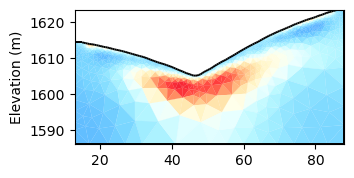

<Figure size 640x480 with 0 Axes>

In [4]:
from palettable.lightbartlein.diverging import BlueDarkRed18_18
fixed_cmap = BlueDarkRed18_18.mpl_colormap

fig = plt.figure(figsize=[16,6])

# True resistivity model
for i in range(12):
    ax = fig.add_subplot(3,4,i+1)
    ax, cbar = pg.show(result.mesh,result.final_models[:,i],pad=0.3,orientation="vertical",cMap=fixed_cmap,cMin= 100,cMax = 3000
                    , ylabel="Elevation (m)",label=' Resistivity ($\Omega$ m)',ax=ax,logScale=False,coverage=result.all_coverage[i]>-1)
    cbar.remove()

## 2. Window L2 time-lapse inversion



Measurement times (can be timestamps or any sequential numbers representing time)



In [5]:
measurement_times = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]  # Adjust based on your actual acquisition times

# Create a mesh for the inversion (or load an existing one)
data = ert.load(os.path.join(data_dir, ert_files[0]))
ert_manager = ert.ERTManager(data)
mesh = ert_manager.createMesh(data=data, quality=34)

# Set up inversion parameters
inversion_params = {
    "lambda_val": 10.0,              # Regularization parameter
    "alpha": 10.0,                   # Temporal regularization parameter
    "decay_rate": 0.0,               # Temporal decay rate
    "method": "cgls",                # Solver method ('cgls', 'lsqr', etc.)
    "model_constraints": (0.001, 1e4), # Min/max resistivity values (ohm-m)
    "max_iterations": 15,            # Maximum iterations
    "absoluteUError": 0.0,           # Absolute data error (V)
    "relativeError": 0.05,           # Relative data error (5%)
    "lambda_rate": 1.0,              # Lambda reduction rate
    "lambda_min": 1.0,               # Minimum lambda value
    "inversion_type": "L2"           # 'L1', 'L2', or 'L1L2'
}

# Define the window size (number of timesteps to process together)
window_size = 3  # A window size of 3 means each window includes 3 consecutive measurements

# Create the windowed time-lapse inversion object
inversion = WindowedTimeLapseERTInversion(
    data_dir=data_dir,               # Directory containing ERT data files
    ert_files=ert_files,             # List of ERT data filenames
    measurement_times=measurement_times,  # List of measurement times
    window_size=window_size,         # Size of sliding window
    mesh=mesh,                       # Mesh for inversion
    **inversion_params               # Pass the same inversion parameters
)

# Run the inversion, optionally in parallel
print("Starting windowed time-lapse inversion...")
result = inversion.run()
print("Inversion complete!")

24/05/25 - 22:32:52 - pyGIMLi - INFO - Found 2 regions.


24/05/25 - 22:32:52 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


Starting windowed time-lapse inversion...

Processing 10 windows sequentially...
Using L2 inversion

Starting L2 inversion for window 0


24/05/25 - 22:32:54 - pyGIMLi - INFO - Found 2 regions.


24/05/25 - 22:32:54 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


24/05/25 - 22:32:54 - pyGIMLi - INFO - Found 2 regions.


24/05/25 - 22:32:54 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


24/05/25 - 22:32:54 - pyGIMLi - INFO - Found 2 regions.


24/05/25 - 22:32:54 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


24/05/25 - 22:32:54 - pyGIMLi - INFO - Creating forward mesh from region infos.


24/05/25 - 22:32:54 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


24/05/25 - 22:32:55 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


24/05/25 - 22:33:04 - pyGIMLi - INFO - Creating forward mesh from region infos.


24/05/25 - 22:33:04 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


24/05/25 - 22:33:04 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


24/05/25 - 22:33:14 - pyGIMLi - INFO - Creating forward mesh from region infos.


24/05/25 - 22:33:14 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


24/05/25 - 22:33:14 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 2614.857697445681
dPhi: 1.0
ERTphi_d: 6495306.520455072, ERTphi_m: 0.0, ERTphi_t: 0.0


-------------------ERT Iteration: 1 ---------------------------


ERT chi2: 57.16073655172875
dPhi: 0.9781400201595803
ERTphi_d: 141987.26959449422, ERTphi_m: 2133.003255893837, ERTphi_t: 2019.3223466965517


-------------------ERT Iteration: 2 ---------------------------


ERT chi2: 22.55573500221438
dPhi: 0.6053981043123522
ERTphi_d: 56028.44574550052, ERTphi_m: 1094.5580317682484, ERTphi_t: 1990.359554027868


-------------------ERT Iteration: 3 ---------------------------


ERT chi2: 10.9322455564055
dPhi: 0.515323018499187
ERTphi_d: 27155.697962111262, ERTphi_m: 777.987125317511, ERTphi_t: 2016.1815216377208


-------------------ERT Iteration: 4 ---------------------------


ERT chi2: 1.4113906714244782
dPhi: 0.8708965450746297
ERTphi_d: 3505.8944278184035, ERTphi_m: 824.8468448433061, ERTphi_t: 2007.1689545064157
Convergence reached at iteration 4


End of inversion

Window 0 results:
Model shape: (1364, 3)
Coverage available: True
Number of iterations: 5



Starting L2 inversion for window 1


24/05/25 - 22:34:59 - pyGIMLi - INFO - Found 2 regions.


24/05/25 - 22:34:59 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


24/05/25 - 22:34:59 - pyGIMLi - INFO - Found 2 regions.


24/05/25 - 22:34:59 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


24/05/25 - 22:34:59 - pyGIMLi - INFO - Found 2 regions.


24/05/25 - 22:34:59 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


24/05/25 - 22:34:59 - pyGIMLi - INFO - Creating forward mesh from region infos.


24/05/25 - 22:34:59 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


24/05/25 - 22:34:59 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


24/05/25 - 22:35:09 - pyGIMLi - INFO - Creating forward mesh from region infos.


24/05/25 - 22:35:09 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


24/05/25 - 22:35:09 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


24/05/25 - 22:35:19 - pyGIMLi - INFO - Creating forward mesh from region infos.


24/05/25 - 22:35:19 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


24/05/25 - 22:35:19 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 2424.799586453877
dPhi: 1.0
ERTphi_d: 6023202.17275143, ERTphi_m: 0.0, ERTphi_t: 0.0


-------------------ERT Iteration: 1 ---------------------------


ERT chi2: 49.15182088877167
dPhi: 0.9797295326329822
ERTphi_d: 122093.12308770882, ERTphi_m: 2029.7080574973747, ERTphi_t: 201.65934388575155


-------------------ERT Iteration: 2 ---------------------------


ERT chi2: 24.897208520457383
dPhi: 0.4934631500875902
ERTphi_d: 61844.66596481614, ERTphi_m: 1047.1914878354132, ERTphi_t: 196.0646129992439


-------------------ERT Iteration: 3 ---------------------------


ERT chi2: 10.83135267684408
dPhi: 0.5649571449769463
ERTphi_d: 26905.080049280696, ERTphi_m: 683.3813858619199, ERTphi_t: 185.19254835267859


-------------------ERT Iteration: 4 ---------------------------


ERT chi2: 1.2211346911253689
dPhi: 0.887259262295467
ERTphi_d: 3033.2985727554164, ERTphi_m: 749.2929797847487, ERTphi_t: 185.18771434480294
Convergence reached at iteration 4


End of inversion

Window 1 results:
Model shape: (1364, 3)
Coverage available: True
Number of iterations: 5



Starting L2 inversion for window 2


24/05/25 - 22:37:10 - pyGIMLi - INFO - Found 2 regions.


24/05/25 - 22:37:10 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


24/05/25 - 22:37:10 - pyGIMLi - INFO - Found 2 regions.


24/05/25 - 22:37:10 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


24/05/25 - 22:37:10 - pyGIMLi - INFO - Found 2 regions.


24/05/25 - 22:37:10 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


24/05/25 - 22:37:10 - pyGIMLi - INFO - Creating forward mesh from region infos.


24/05/25 - 22:37:10 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


24/05/25 - 22:37:10 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


24/05/25 - 22:37:20 - pyGIMLi - INFO - Creating forward mesh from region infos.


24/05/25 - 22:37:20 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


24/05/25 - 22:37:20 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


24/05/25 - 22:37:29 - pyGIMLi - INFO - Creating forward mesh from region infos.


24/05/25 - 22:37:29 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


24/05/25 - 22:37:29 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 2361.2976889094757
dPhi: 1.0
ERTphi_d: 5865463.459251137, ERTphi_m: 0.0, ERTphi_t: 0.0


-------------------ERT Iteration: 1 ---------------------------


ERT chi2: 46.755866893480054
dPhi: 0.9801990798902305
ERTphi_d: 116141.57336340444, ERTphi_m: 2035.5921934192395, ERTphi_t: 271.626001673944


-------------------ERT Iteration: 2 ---------------------------


ERT chi2: 25.44126583462781
dPhi: 0.455870085938338
ERTphi_d: 63196.10433321548, ERTphi_m: 1048.3151489693867, ERTphi_t: 268.2950906811096


-------------------ERT Iteration: 3 ---------------------------


ERT chi2: 10.645345154319843
dPhi: 0.5815717180302173
ERTphi_d: 26443.03736333049, ERTphi_m: 704.7291619170779, ERTphi_t: 261.1529341722753


-------------------ERT Iteration: 4 ---------------------------


ERT chi2: 1.3259842382362352
dPhi: 0.8754399956963203
ERTphi_d: 3293.7448477788084, ERTphi_m: 767.14513889329, ERTphi_t: 258.77238747183895
Convergence reached at iteration 4


End of inversion

Window 2 results:
Model shape: (1364, 3)
Coverage available: True
Number of iterations: 5



Starting L2 inversion for window 3


24/05/25 - 22:39:19 - pyGIMLi - INFO - Found 2 regions.


24/05/25 - 22:39:19 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


24/05/25 - 22:39:19 - pyGIMLi - INFO - Found 2 regions.


24/05/25 - 22:39:19 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


24/05/25 - 22:39:19 - pyGIMLi - INFO - Found 2 regions.


24/05/25 - 22:39:19 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


24/05/25 - 22:39:19 - pyGIMLi - INFO - Creating forward mesh from region infos.


24/05/25 - 22:39:19 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


24/05/25 - 22:39:19 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


24/05/25 - 22:39:29 - pyGIMLi - INFO - Creating forward mesh from region infos.


24/05/25 - 22:39:29 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


24/05/25 - 22:39:29 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


24/05/25 - 22:39:39 - pyGIMLi - INFO - Creating forward mesh from region infos.


24/05/25 - 22:39:39 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


24/05/25 - 22:39:39 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 2335.406380855519
dPhi: 1.0
ERTphi_d: 5801149.450045109, ERTphi_m: 0.0, ERTphi_t: 0.0


-------------------ERT Iteration: 1 ---------------------------


ERT chi2: 46.560955194860234
dPhi: 0.9800630179070575
ERTphi_d: 115657.41270403283, ERTphi_m: 2016.0965933630468, ERTphi_t: 246.01913854841175


-------------------ERT Iteration: 2 ---------------------------


ERT chi2: 25.851683421381036
dPhi: 0.44477764012378446
ERTphi_d: 64215.581618710494, ERTphi_m: 1001.7144494932209, ERTphi_t: 247.25800445345715


-------------------ERT Iteration: 3 ---------------------------


ERT chi2: 10.734800702143064
dPhi: 0.5847542874803782
ERTphi_d: 26665.24494412337, ERTphi_m: 672.1036389733492, ERTphi_t: 239.3721036665533


-------------------ERT Iteration: 4 ---------------------------


ERT chi2: 1.3377518212779602
dPhi: 0.8753817738776561
ERTphi_d: 3322.975524054453, ERTphi_m: 720.2485656561621, ERTphi_t: 238.7668273361141
Convergence reached at iteration 4


End of inversion

Window 3 results:
Model shape: (1364, 3)
Coverage available: True
Number of iterations: 5



Starting L2 inversion for window 4


24/05/25 - 22:41:30 - pyGIMLi - INFO - Found 2 regions.


24/05/25 - 22:41:30 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


24/05/25 - 22:41:30 - pyGIMLi - INFO - Found 2 regions.


24/05/25 - 22:41:30 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


24/05/25 - 22:41:30 - pyGIMLi - INFO - Found 2 regions.


24/05/25 - 22:41:30 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


24/05/25 - 22:41:30 - pyGIMLi - INFO - Creating forward mesh from region infos.


24/05/25 - 22:41:30 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


24/05/25 - 22:41:30 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


24/05/25 - 22:41:40 - pyGIMLi - INFO - Creating forward mesh from region infos.


24/05/25 - 22:41:40 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


24/05/25 - 22:41:40 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


24/05/25 - 22:41:50 - pyGIMLi - INFO - Creating forward mesh from region infos.


24/05/25 - 22:41:50 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


24/05/25 - 22:41:50 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 2119.5610754349227
dPhi: 1.0
ERTphi_d: 5264989.711380348, ERTphi_m: 0.0, ERTphi_t: 0.0


-------------------ERT Iteration: 1 ---------------------------


ERT chi2: 43.203496700004365
dPhi: 0.9796167719813691
ERTphi_d: 107317.48580281084, ERTphi_m: 2036.5851479786302, ERTphi_t: 1915.4407940770034


-------------------ERT Iteration: 2 ---------------------------


ERT chi2: 24.884087194658218
dPhi: 0.42402608364207467
ERTphi_d: 61812.07259153101, ERTphi_m: 1012.9461339313791, ERTphi_t: 1887.0031923165004


-------------------ERT Iteration: 3 ---------------------------


ERT chi2: 9.432341122755123
dPhi: 0.6209488799420406
ERTphi_d: 23429.935348923726, ERTphi_m: 734.9573956428759, ERTphi_t: 1888.505719397765


-------------------ERT Iteration: 4 ---------------------------


ERT chi2: 1.5055504859129483
dPhi: 0.8403842199598919
ERTphi_d: 3739.7874070077632, ERTphi_m: 768.7531633062582, ERTphi_t: 1875.5138854901418


-------------------ERT Iteration: 5 ---------------------------


ERT chi2: 1.1636252914555916
dPhi: 0.22710974999288533
ERTphi_d: 2890.4452239756893, ERTphi_m: 743.8233221262482, ERTphi_t: 1869.4046128785776
Convergence reached at iteration 5


End of inversion

Window 4 results:
Model shape: (1364, 3)
Coverage available: True
Number of iterations: 6



Starting L2 inversion for window 5


24/05/25 - 22:44:10 - pyGIMLi - INFO - Found 2 regions.


24/05/25 - 22:44:10 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


24/05/25 - 22:44:10 - pyGIMLi - INFO - Found 2 regions.


24/05/25 - 22:44:10 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


24/05/25 - 22:44:10 - pyGIMLi - INFO - Found 2 regions.


24/05/25 - 22:44:10 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


24/05/25 - 22:44:10 - pyGIMLi - INFO - Creating forward mesh from region infos.


24/05/25 - 22:44:10 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


24/05/25 - 22:44:10 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


24/05/25 - 22:44:20 - pyGIMLi - INFO - Creating forward mesh from region infos.


24/05/25 - 22:44:20 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


24/05/25 - 22:44:20 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


24/05/25 - 22:44:29 - pyGIMLi - INFO - Creating forward mesh from region infos.


24/05/25 - 22:44:29 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


24/05/25 - 22:44:29 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 1950.723115414603
dPhi: 1.0
ERTphi_d: 4845596.218689874, ERTphi_m: 0.0, ERTphi_t: 0.0


-------------------ERT Iteration: 1 ---------------------------


ERT chi2: 41.53062521035555
dPhi: 0.9787101383675721
ERTphi_d: 103162.0730225232, ERTphi_m: 2021.0803076002612, ERTphi_t: 1928.3174831699357


-------------------ERT Iteration: 2 ---------------------------


ERT chi2: 23.365101458994364
dPhi: 0.43740068104805857
ERTphi_d: 58038.912024142, ERTphi_m: 1051.94961796091, ERTphi_t: 1907.416040587268


-------------------ERT Iteration: 3 ---------------------------


ERT chi2: 8.185716673817543
dPhi: 0.6496605551581518
ERTphi_d: 20333.320217762775, ERTphi_m: 756.3418045464609, ERTphi_t: 1917.9851370229044


-------------------ERT Iteration: 4 ---------------------------


ERT chi2: 1.4235328729651622
dPhi: 0.8260955112802268
ERTphi_d: 3536.055656445463, ERTphi_m: 788.4096800609769, ERTphi_t: 1902.3195806570966
Convergence reached at iteration 4


End of inversion

Window 5 results:
Model shape: (1364, 3)
Coverage available: True
Number of iterations: 5



Starting L2 inversion for window 6


24/05/25 - 22:46:19 - pyGIMLi - INFO - Found 2 regions.


24/05/25 - 22:46:19 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


24/05/25 - 22:46:19 - pyGIMLi - INFO - Found 2 regions.


24/05/25 - 22:46:19 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


24/05/25 - 22:46:19 - pyGIMLi - INFO - Found 2 regions.


24/05/25 - 22:46:19 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


24/05/25 - 22:46:20 - pyGIMLi - INFO - Creating forward mesh from region infos.


24/05/25 - 22:46:20 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


24/05/25 - 22:46:20 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


24/05/25 - 22:46:29 - pyGIMLi - INFO - Creating forward mesh from region infos.


24/05/25 - 22:46:29 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


24/05/25 - 22:46:29 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


24/05/25 - 22:46:39 - pyGIMLi - INFO - Creating forward mesh from region infos.


24/05/25 - 22:46:39 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


24/05/25 - 22:46:39 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 1883.650824187547
dPhi: 1.0
ERTphi_d: 4678988.6472818665, ERTphi_m: 0.0, ERTphi_t: 0.0


-------------------ERT Iteration: 1 ---------------------------


ERT chi2: 44.845163506833735
dPhi: 0.9761924222201976
ERTphi_d: 111395.386150975, ERTphi_m: 1953.1852308551115, ERTphi_t: 1358.0583651347467


-------------------ERT Iteration: 2 ---------------------------


ERT chi2: 22.49619135421429
dPhi: 0.49835858328878196
ERTphi_d: 55880.539323868295, ERTphi_m: 1037.7414963277365, ERTphi_t: 1330.4225821013767


-------------------ERT Iteration: 3 ---------------------------


ERT chi2: 7.98304895085479
dPhi: 0.6451377557579631
ERTphi_d: 19829.893593923298, ERTphi_m: 725.5656095357383, ERTphi_t: 1345.2446277835593


-------------------ERT Iteration: 4 ---------------------------


ERT chi2: 1.367691979461731
dPhi: 0.8286754862858151
ERTphi_d: 3397.3468769829396, ERTphi_m: 765.6526584764208, ERTphi_t: 1334.410891371757
Convergence reached at iteration 4


End of inversion

Window 6 results:
Model shape: (1364, 3)
Coverage available: True
Number of iterations: 5



Starting L2 inversion for window 7


24/05/25 - 22:48:29 - pyGIMLi - INFO - Found 2 regions.


24/05/25 - 22:48:29 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


24/05/25 - 22:48:29 - pyGIMLi - INFO - Found 2 regions.


24/05/25 - 22:48:29 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


24/05/25 - 22:48:29 - pyGIMLi - INFO - Found 2 regions.


24/05/25 - 22:48:29 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


24/05/25 - 22:48:29 - pyGIMLi - INFO - Creating forward mesh from region infos.


24/05/25 - 22:48:29 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


24/05/25 - 22:48:29 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


24/05/25 - 22:48:38 - pyGIMLi - INFO - Creating forward mesh from region infos.


24/05/25 - 22:48:38 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


24/05/25 - 22:48:38 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


24/05/25 - 22:48:48 - pyGIMLi - INFO - Creating forward mesh from region infos.


24/05/25 - 22:48:48 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


24/05/25 - 22:48:48 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 2080.9823041318746
dPhi: 1.0
ERTphi_d: 5169160.043463577, ERTphi_m: 0.0, ERTphi_t: 0.0


-------------------ERT Iteration: 1 ---------------------------


ERT chi2: 53.03977642556602
dPhi: 0.9745121444232113
ERTphi_d: 131750.804641106, ERTphi_m: 1898.324156440062, ERTphi_t: 1438.1694368267836


-------------------ERT Iteration: 2 ---------------------------


ERT chi2: 20.891051110737664
dPhi: 0.6061248270898094
ERTphi_d: 51893.37095907235, ERTphi_m: 999.191814525675, ERTphi_t: 1402.702089895964


-------------------ERT Iteration: 3 ---------------------------


ERT chi2: 8.494560937564154
dPhi: 0.5933875757358094
ERTphi_d: 21100.48936890936, ERTphi_m: 668.7632209037306, ERTphi_t: 1397.4962391140505


-------------------ERT Iteration: 4 ---------------------------


ERT chi2: 1.3289450857588458
dPhi: 0.8435534107616954
ERTphi_d: 3301.099593024973, ERTphi_m: 719.3923225870938, ERTphi_t: 1387.9168335101692
Convergence reached at iteration 4


End of inversion

Window 7 results:
Model shape: (1364, 3)
Coverage available: True
Number of iterations: 5



Starting L2 inversion for window 8


24/05/25 - 22:50:42 - pyGIMLi - INFO - Found 2 regions.


24/05/25 - 22:50:42 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


24/05/25 - 22:50:42 - pyGIMLi - INFO - Found 2 regions.


24/05/25 - 22:50:42 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


24/05/25 - 22:50:42 - pyGIMLi - INFO - Found 2 regions.


24/05/25 - 22:50:42 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


24/05/25 - 22:50:42 - pyGIMLi - INFO - Creating forward mesh from region infos.


24/05/25 - 22:50:42 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


24/05/25 - 22:50:42 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


24/05/25 - 22:50:52 - pyGIMLi - INFO - Creating forward mesh from region infos.


24/05/25 - 22:50:52 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


24/05/25 - 22:50:52 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


24/05/25 - 22:51:01 - pyGIMLi - INFO - Creating forward mesh from region infos.


24/05/25 - 22:51:01 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


24/05/25 - 22:51:01 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 2339.9500473783282
dPhi: 1.0
ERTphi_d: 5812435.917687767, ERTphi_m: 0.0, ERTphi_t: 0.0


-------------------ERT Iteration: 1 ---------------------------


ERT chi2: 60.965748991835724
dPhi: 0.9739457049264185
ERTphi_d: 151438.92049571994, ERTphi_m: 1919.0577982528503, ERTphi_t: 690.3463467540149


-------------------ERT Iteration: 2 ---------------------------


ERT chi2: 21.21891549643844
dPhi: 0.6519535009849549
ERTphi_d: 52707.78609315309, ERTphi_m: 944.7913967523074, ERTphi_t: 672.2320784514739


-------------------ERT Iteration: 3 ---------------------------


ERT chi2: 9.889800315580564
dPhi: 0.5339158442267914
ERTphi_d: 24566.26398390212, ERTphi_m: 613.2842048396997, ERTphi_t: 676.5429540117213


-------------------ERT Iteration: 4 ---------------------------


ERT chi2: 1.2898629139704008
dPhi: 0.8695764451443647
ERTphi_d: 3204.0194783024754, ERTphi_m: 661.4004038123053, ERTphi_t: 671.9408812356405
Convergence reached at iteration 4


End of inversion

Window 8 results:
Model shape: (1364, 3)
Coverage available: True
Number of iterations: 5



Starting L2 inversion for window 9


24/05/25 - 22:52:50 - pyGIMLi - INFO - Found 2 regions.


24/05/25 - 22:52:50 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


24/05/25 - 22:52:50 - pyGIMLi - INFO - Found 2 regions.


24/05/25 - 22:52:50 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


24/05/25 - 22:52:50 - pyGIMLi - INFO - Found 2 regions.


24/05/25 - 22:52:50 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


24/05/25 - 22:52:50 - pyGIMLi - INFO - Creating forward mesh from region infos.


24/05/25 - 22:52:50 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


24/05/25 - 22:52:50 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


24/05/25 - 22:52:59 - pyGIMLi - INFO - Creating forward mesh from region infos.


24/05/25 - 22:52:59 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


24/05/25 - 22:52:59 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


24/05/25 - 22:53:09 - pyGIMLi - INFO - Creating forward mesh from region infos.


24/05/25 - 22:53:09 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


24/05/25 - 22:53:09 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 2547.2932024544716
dPhi: 1.0
ERTphi_d: 6327476.314896908, ERTphi_m: 0.0, ERTphi_t: 0.0


-------------------ERT Iteration: 1 ---------------------------


ERT chi2: 62.81224579464403
dPhi: 0.9753415720914573
ERTphi_d: 156025.61855389577, ERTphi_m: 2154.8025635697513, ERTphi_t: 930.4779534147474


-------------------ERT Iteration: 2 ---------------------------


ERT chi2: 21.75493013315524
dPhi: 0.6536514519114635
ERTphi_d: 54039.24645075762, ERTphi_m: 1116.1732211053359, ERTphi_t: 909.6446497389655


-------------------ERT Iteration: 3 ---------------------------


ERT chi2: 10.478575598463651
dPhi: 0.5183355894812114
ERTphi_d: 26028.78178658371, ERTphi_m: 804.1941564921749, ERTphi_t: 909.2203773099594


-------------------ERT Iteration: 4 ---------------------------


ERT chi2: 1.313421095334913
dPhi: 0.8746565233992791
ERTphi_d: 3262.538000811924, ERTphi_m: 854.9260922592373, ERTphi_t: 905.3651914967711
Convergence reached at iteration 4


End of inversion

Window 9 results:
Model shape: (1364, 3)
Coverage available: True
Number of iterations: 5



Final result summary:
Model shape: (1364, 12)
Number of coverage arrays: 12
Number of chi2 values: 51
Mesh exists: True
Inversion complete!


In [6]:
result.final_models = np.array(result.final_models)
result.final_models.shape

(1364, 12)

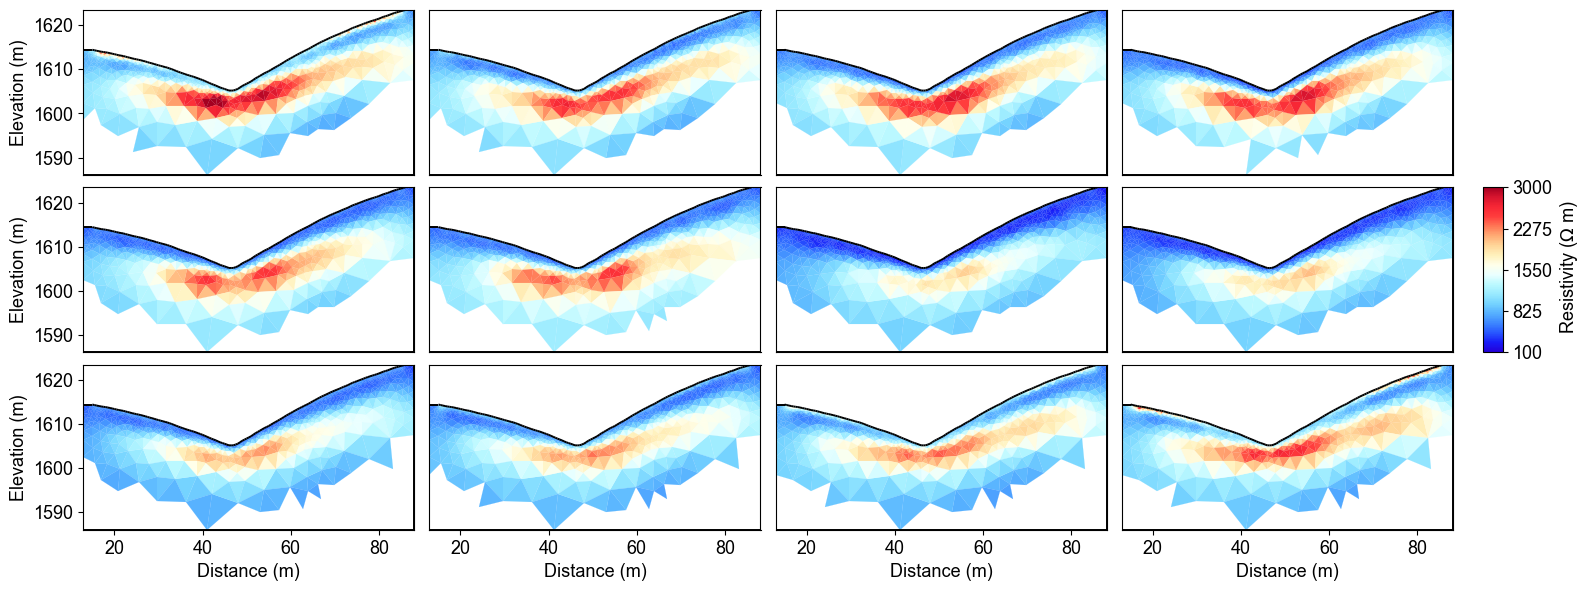

In [7]:
from palettable.lightbartlein.diverging import BlueDarkRed18_18
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pylab as pylab
params = {'legend.fontsize': 13,
          #'figure.figsize': (15, 5),
         'axes.labelsize': 13,
         'axes.titlesize':13,
         'xtick.labelsize':13,
         'ytick.labelsize':13}

pylab.rcParams.update(params)
plt.rcParams["font.family"] = "Arial"

fixed_cmap = BlueDarkRed18_18.mpl_colormap
fig = plt.figure(figsize=[16, 6])

# Use tight_layout with adjusted parameters to reduce space
plt.subplots_adjust(wspace=0.05, hspace=0.05)

# True resistivity model
for i in range(12):
    row, col = i // 4, i % 4
    ax = fig.add_subplot(3, 4, i+1)
    
    # Add common ylabel only to leftmost panels
    ylabel = "Elevation (m)" if col == 0 else None
    
    # Add resistivity label only to the middle-right panel (row 1, col 3)
    resistivity_label = ' Resistivity ($\Omega$ m)' if (i == 7) else None
    
    # Only show axis ticks on leftmost and bottom panels
    if col != 0:
        ax.set_yticks([])
    
    if row != 2:  # Not bottom row
        ax.set_xticks([])
    else:
        # Add "distance (m)" label to bottom row panels
        ax.set_xlabel("Distance (m)")
    
    # Create the plot
    ax, cbar = pg.show(result.mesh,
                      result.final_models[:,i],
                      pad=0.3,
                      orientation="vertical",
                      cMap=fixed_cmap,
                      cMin=100,
                      cMax=3000,
                      ylabel=ylabel,
                      label=resistivity_label,
                      ax=ax,
                      logScale=False,
                      coverage=result.all_coverage[i]>-1.2)
    
    # Only keep colorbar for the middle-right panel (row 1, col 3)
    # This corresponds to panel index 7 in a 0-based indexing system
    if i != 7:  # Keep only the colorbar for panel 7
        cbar.remove()

plt.tight_layout()

## 3. Full L1 Time-lapse Inversion



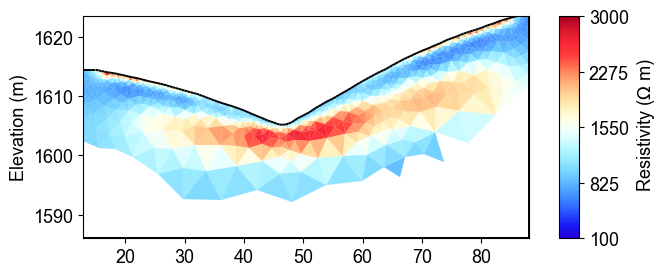

In [8]:
ax, cbar = pg.show(result.mesh,result.final_models[:,i],pad=0.3,orientation="vertical",cMap=fixed_cmap,cMin= 100,cMax = 3000
                    , ylabel="Elevation (m)",label=' Resistivity ($\Omega$ m)',logScale=False,coverage=result.all_coverage[i]>-1)

Full paths to data files



In [9]:
data_files = [os.path.join(data_dir, f) for f in ert_files]

# Measurement times (can be timestamps or any sequential numbers representing time)
measurement_times = [1, 2, 3, 4, 5, 6, 7 ,8, 9, 10, 11, 12]  # Adjust based on your actual acquisition times

# Create a mesh for the inversion (or load an existing one)
data = ert.load(data_files[0])
ert_manager = ert.ERTManager(data)
mesh = ert_manager.createMesh(data=data, quality=34)

# Set up inversion parameters
inversion_params = {
    "lambda_val": 50.0,              # Regularization parameter
    "alpha": 10.0,                   # Temporal regularization parameter
    "decay_rate": 0.0,               # Temporal decay rate
    "method": "cgls",                # Solver method ('cgls', 'lsqr', etc.)
    "model_constraints": (0.001, 1e4), # Min/max resistivity values (ohm-m)
    "max_iterations": 15,            # Maximum iterations
    "absoluteUError": 0.0,           # Absolute data error (V)
    "relativeError": 0.05,           # Relative data error (5%)
    "lambda_rate": 1.0,              # Lambda reduction rate
    "lambda_min": 1.0,               # Minimum lambda value
    "inversion_type": "L1"           # 'L1', 'L2', or 'L1L2'
}

# Create the time-lapse inversion object
inversion = TimeLapseERTInversion(
    data_files=data_files,
    measurement_times=measurement_times,
    mesh=mesh,
    **inversion_params
)

# Run the inversion
print("Starting time-lapse inversion...")
result_L1 = inversion.run()
print("Inversion complete!")

24/05/25 - 22:55:03 - pyGIMLi - INFO - Found 2 regions.


24/05/25 - 22:55:03 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


24/05/25 - 22:55:03 - pyGIMLi - INFO - Found 2 regions.


24/05/25 - 22:55:03 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


24/05/25 - 22:55:03 - pyGIMLi - INFO - Found 2 regions.


24/05/25 - 22:55:03 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


24/05/25 - 22:55:03 - pyGIMLi - INFO - Found 2 regions.


24/05/25 - 22:55:03 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


24/05/25 - 22:55:03 - pyGIMLi - INFO - Found 2 regions.


24/05/25 - 22:55:03 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


24/05/25 - 22:55:03 - pyGIMLi - INFO - Found 2 regions.


24/05/25 - 22:55:03 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


24/05/25 - 22:55:03 - pyGIMLi - INFO - Found 2 regions.


24/05/25 - 22:55:03 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


24/05/25 - 22:55:03 - pyGIMLi - INFO - Found 2 regions.


24/05/25 - 22:55:03 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


24/05/25 - 22:55:03 - pyGIMLi - INFO - Found 2 regions.


24/05/25 - 22:55:03 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


24/05/25 - 22:55:03 - pyGIMLi - INFO - Found 2 regions.


Starting time-lapse inversion...


24/05/25 - 22:55:03 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


24/05/25 - 22:55:03 - pyGIMLi - INFO - Found 2 regions.


24/05/25 - 22:55:03 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


24/05/25 - 22:55:03 - pyGIMLi - INFO - Found 2 regions.


24/05/25 - 22:55:03 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


24/05/25 - 22:55:03 - pyGIMLi - INFO - Found 2 regions.


24/05/25 - 22:55:03 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


24/05/25 - 22:55:04 - pyGIMLi - INFO - Creating forward mesh from region infos.


24/05/25 - 22:55:04 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


24/05/25 - 22:55:04 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
------------------- IRLS Iteration: 1 ---------------------------
-------------------ERT Iteration: 0 ---------------------------


24/05/25 - 22:55:15 - pyGIMLi - INFO - Creating forward mesh from region infos.


24/05/25 - 22:55:15 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


24/05/25 - 22:55:15 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


24/05/25 - 22:55:24 - pyGIMLi - INFO - Creating forward mesh from region infos.


24/05/25 - 22:55:24 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


24/05/25 - 22:55:24 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


24/05/25 - 22:55:34 - pyGIMLi - INFO - Creating forward mesh from region infos.


24/05/25 - 22:55:34 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


24/05/25 - 22:55:34 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


24/05/25 - 22:55:44 - pyGIMLi - INFO - Creating forward mesh from region infos.


24/05/25 - 22:55:44 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


24/05/25 - 22:55:44 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


24/05/25 - 22:55:54 - pyGIMLi - INFO - Creating forward mesh from region infos.


24/05/25 - 22:55:54 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


24/05/25 - 22:55:54 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


24/05/25 - 22:56:04 - pyGIMLi - INFO - Creating forward mesh from region infos.


24/05/25 - 22:56:04 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


24/05/25 - 22:56:05 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


24/05/25 - 22:56:15 - pyGIMLi - INFO - Creating forward mesh from region infos.


24/05/25 - 22:56:15 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


24/05/25 - 22:56:15 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


24/05/25 - 22:56:26 - pyGIMLi - INFO - Creating forward mesh from region infos.


24/05/25 - 22:56:26 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


24/05/25 - 22:56:26 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


24/05/25 - 22:56:38 - pyGIMLi - INFO - Creating forward mesh from region infos.


24/05/25 - 22:56:38 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


24/05/25 - 22:56:38 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


24/05/25 - 22:56:49 - pyGIMLi - INFO - Creating forward mesh from region infos.


24/05/25 - 22:56:49 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


24/05/25 - 22:56:49 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


24/05/25 - 22:57:01 - pyGIMLi - INFO - Creating forward mesh from region infos.


24/05/25 - 22:57:01 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


24/05/25 - 22:57:01 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 2345.302026235805
dPhi: 1.0
ERTphi_d: 9774345.116330786, ERTphi_m: 0.0, ERTphi_t: 0.0


-------------------ERT Iteration: 1 ---------------------------


ERT chi2: 27.88963522281076
dPhi: 0.9881082969652427
ERTphi_d: 796718.9510931845, ERTphi_m: 17837.094889497657, ERTphi_t: 3813.0420300312917


-------------------ERT Iteration: 2 ---------------------------


ERT chi2: 6.960650124555295
dPhi: 0.750421614734415
ERTphi_d: 349998.6499148932, ERTphi_m: 30168.931161752495, ERTphi_t: 12984.687216288054


-------------------ERT Iteration: 3 ---------------------------


ERT chi2: 3.367077233395422
dPhi: 0.5162697200485221
ERTphi_d: 247935.01781488897, ERTphi_m: 37053.56086955759, ERTphi_t: 17688.69152133331


-------------------ERT Iteration: 4 ---------------------------


ERT chi2: 2.339416439450478
dPhi: 0.3052085600390675
ERTphi_d: 211258.7389166265, ERTphi_m: 41537.442372956364, ERTphi_t: 20109.8582618513


-------------------ERT Iteration: 5 ---------------------------


ERT chi2: 1.934822099938128
dPhi: 0.17294669417959127
ERTphi_d: 195045.44936667685, ERTphi_m: 44513.72907668628, ERTphi_t: 21403.3044941756


-------------------ERT Iteration: 6 ---------------------------


ERT chi2: 1.718080658032908
dPhi: 0.11202138011145885
ERTphi_d: 186092.15909465653, ERTphi_m: 46754.019826182215, ERTphi_t: 22240.856776769164


-------------------ERT Iteration: 7 ---------------------------


ERT chi2: 1.578421566800379
dPhi: 0.08128785489758657
ERTphi_d: 180505.14923543442, ERTphi_m: 48505.12571610589, ERTphi_t: 22808.059438706776


-------------------ERT Iteration: 8 ---------------------------


ERT chi2: 1.4809780702482287
dPhi: 0.06173477263724805
ERTphi_d: 176667.18811712053, ERTphi_m: 49909.3621624477, ERTphi_t: 23213.87372794428
Convergence reached at iteration 8
------------------- IRLS Iteration: 2 ---------------------------
-------------------ERT Iteration: 0 ---------------------------


ERT chi2: 1.4809780702482287
dPhi: 1.0
ERTphi_d: 176667.18811712053, ERTphi_m: 49909.3621624477, ERTphi_t: 23213.87372794428
Convergence reached at iteration 0
IRLS relative change: 0.0
IRLS converged after 2 iterations


End of inversion
Inversion complete!


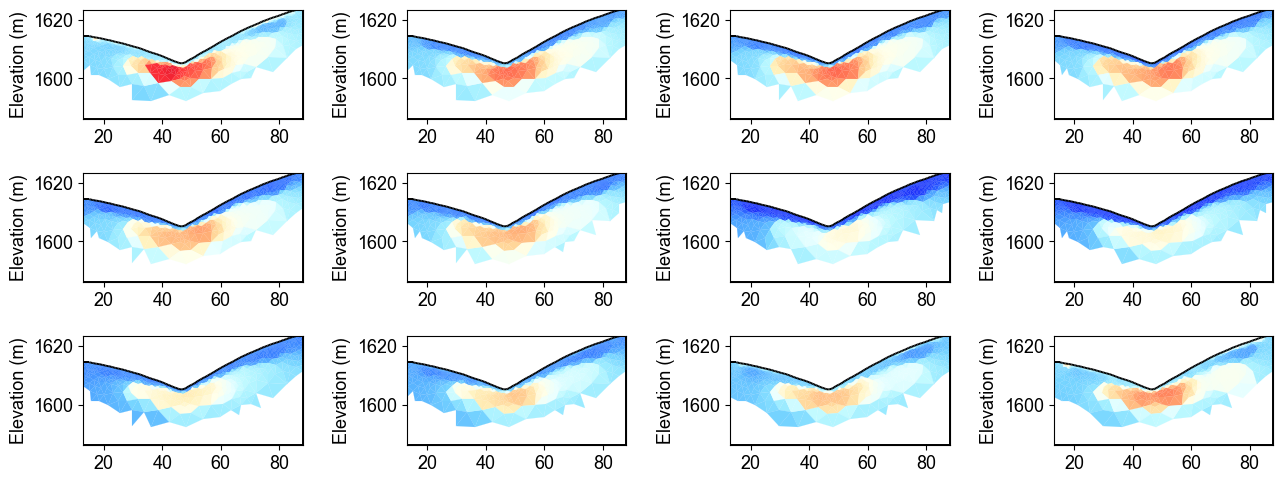

In [10]:
from palettable.lightbartlein.diverging import BlueDarkRed18_18
fixed_cmap = BlueDarkRed18_18.mpl_colormap

fig = plt.figure(figsize=[16,6])

# True resistivity model
for i in range(12):
    ax = fig.add_subplot(3,4,i+1)
    ax, cbar = pg.show(result_L1.mesh,result_L1.final_models[:,i],pad=0.3,orientation="vertical",cMap=fixed_cmap,cMin= 100,cMax = 3000
                    , ylabel="Elevation (m)",label=' Resistivity ($\Omega$ m)',ax=ax,logScale=False,coverage=result.all_coverage[i]>-1)
    cbar.remove()